The olympic [data](https://www.kaggle.com/datasets/amirba/olympic-sports-and-medals-18962021/?select=summer.csv) includes the year, city, sport, discipline, country, gender, event, medal and athlete

In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import classification_report, confusion_matrix

In [2]:
olympicgamesmedals = pd.read_csv('olympicgamesmedals1896-2022summer.csv')
olympicgamesmedals

,Year,City,Sport,Discipline,Country,Gender,Event,Medal,Athlete
0,1896,Athens,Aquatics,Swimming,AUT,Men,100M Freestyle,Silver,"HERSCHMANN, Otto"
1,1896,Athens,Aquatics,Swimming,AUT,Men,400M Freestyle,Gold,"NEUMANN, Paul"
2,1896,Athens,Aquatics,Swimming,GRE,Men,100M Freestyle For Sailors,Bronze,"DRIVAS, Dimitrios"
3,1896,Athens,Aquatics,Swimming,GRE,Men,100M Freestyle For Sailors,Gold,"MALOKINIS, Ioannis"
4,1896,Athens,Aquatics,Swimming,GRE,Men,100M Freestyle For Sailors,Silver,"CHASAPIS, Spiridon"
...,...,...,...,...,...,...,...,...,...
16797,2020,Tokyo,Wrestling,Wrestling,UKR,Women,"Light-Heavyweight, Freestyle",Bronze,Alla Cherkasova
16798,2020,Tokyo,Wrestling,Wrestling,GER,Women,"Heavyweight, Freestyle",Gold,Aline Rotter-Focken
16799,2020,Tokyo,Wrestling,Wrestling,USA,Women,"Heavyweight, Freestyle",Silver,Adeline Gray
16800,2020,Tokyo,Wrestling,Wrestling,CHN,Women,"Heavyweight, Freestyle",Bronze,Zhou Qian


In [3]:
olympicgamesmedals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16802 entries, 0 to 16801
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        16802 non-null  int64 
 1   City        16802 non-null  object
 2   Sport       16802 non-null  object
 3   Discipline  16802 non-null  object
 4   Country     16802 non-null  object
 5   Gender      16802 non-null  object
 6   Event       16802 non-null  object
 7   Medal       16802 non-null  object
 8   Athlete     16802 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.2+ MB


In [4]:
olympicgamesmedals.isna().sum()

Year          0
City          0
Sport         0
Discipline    0
Country       0
Gender        0
Event         0
Medal         0
Athlete       0
dtype: int64

In [5]:
olympicgamesmedals.drop(['Athlete','Discipline'],axis=1)

,Year,City,Sport,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,AUT,Men,100M Freestyle,Silver
1,1896,Athens,Aquatics,AUT,Men,400M Freestyle,Gold
2,1896,Athens,Aquatics,GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...
16797,2020,Tokyo,Wrestling,UKR,Women,"Light-Heavyweight, Freestyle",Bronze
16798,2020,Tokyo,Wrestling,GER,Women,"Heavyweight, Freestyle",Gold
16799,2020,Tokyo,Wrestling,USA,Women,"Heavyweight, Freestyle",Silver
16800,2020,Tokyo,Wrestling,CHN,Women,"Heavyweight, Freestyle",Bronze


In [6]:
olympicgamesmedals = olympicgamesmedals.drop(['Athlete','Discipline'],axis=1)

In [7]:
olympicgamesmedals

,Year,City,Sport,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,AUT,Men,100M Freestyle,Silver
1,1896,Athens,Aquatics,AUT,Men,400M Freestyle,Gold
2,1896,Athens,Aquatics,GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...
16797,2020,Tokyo,Wrestling,UKR,Women,"Light-Heavyweight, Freestyle",Bronze
16798,2020,Tokyo,Wrestling,GER,Women,"Heavyweight, Freestyle",Gold
16799,2020,Tokyo,Wrestling,USA,Women,"Heavyweight, Freestyle",Silver
16800,2020,Tokyo,Wrestling,CHN,Women,"Heavyweight, Freestyle",Bronze


In [8]:
olympicgamesmedals['Gender'].replace('Men',1).replace('Women',0)

0        1
1        1
2        1
3        1
4        1
        ..
16797    0
16798    0
16799    0
16800    0
16801    0
Name: Gender, Length: 16802, dtype: object

In [9]:
olympicgamesmedals['Gender'] =olympicgamesmedals['Gender'].replace('Men',1).replace('Women',0).replace('Mixed',0).replace('Open',0)

In [10]:
olympicgamesmedals

,Year,City,Sport,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,AUT,1,100M Freestyle,Silver
1,1896,Athens,Aquatics,AUT,1,400M Freestyle,Gold
2,1896,Athens,Aquatics,GRE,1,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,GRE,1,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,GRE,1,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...
16797,2020,Tokyo,Wrestling,UKR,0,"Light-Heavyweight, Freestyle",Bronze
16798,2020,Tokyo,Wrestling,GER,0,"Heavyweight, Freestyle",Gold
16799,2020,Tokyo,Wrestling,USA,0,"Heavyweight, Freestyle",Silver
16800,2020,Tokyo,Wrestling,CHN,0,"Heavyweight, Freestyle",Bronze


In [11]:
olympicgamesmedals['Medal'] =olympicgamesmedals['Medal'].replace('Gold',1).replace('Silver',0).replace('Bronze',0)

In [12]:
olympicgamesmedals

,Year,City,Sport,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,AUT,1,100M Freestyle,0
1,1896,Athens,Aquatics,AUT,1,400M Freestyle,1
2,1896,Athens,Aquatics,GRE,1,100M Freestyle For Sailors,0
3,1896,Athens,Aquatics,GRE,1,100M Freestyle For Sailors,1
4,1896,Athens,Aquatics,GRE,1,100M Freestyle For Sailors,0
...,...,...,...,...,...,...,...
16797,2020,Tokyo,Wrestling,UKR,0,"Light-Heavyweight, Freestyle",0
16798,2020,Tokyo,Wrestling,GER,0,"Heavyweight, Freestyle",1
16799,2020,Tokyo,Wrestling,USA,0,"Heavyweight, Freestyle",0
16800,2020,Tokyo,Wrestling,CHN,0,"Heavyweight, Freestyle",0


In [13]:
olympicgamesmedals.columns

Index(['Year', 'City', 'Sport', 'Country', 'Gender', 'Event', 'Medal'], dtype='object')

In [14]:
olympicgamesmedals[['Medal','Gender','Year','City', 'Sport', 'Country','Event']]

,Medal,Gender,Year,City,Sport,Country,Event
0,0,1,1896,Athens,Aquatics,AUT,100M Freestyle
1,1,1,1896,Athens,Aquatics,AUT,400M Freestyle
2,0,1,1896,Athens,Aquatics,GRE,100M Freestyle For Sailors
3,1,1,1896,Athens,Aquatics,GRE,100M Freestyle For Sailors
4,0,1,1896,Athens,Aquatics,GRE,100M Freestyle For Sailors
...,...,...,...,...,...,...,...
16797,0,0,2020,Tokyo,Wrestling,UKR,"Light-Heavyweight, Freestyle"
16798,1,0,2020,Tokyo,Wrestling,GER,"Heavyweight, Freestyle"
16799,0,0,2020,Tokyo,Wrestling,USA,"Heavyweight, Freestyle"
16800,0,0,2020,Tokyo,Wrestling,CHN,"Heavyweight, Freestyle"


In [15]:
olympicgamesmedals = olympicgamesmedals[['Medal','Gender','Year','City', 'Sport', 'Country','Event']]

[The Wolrd Happiness Report 2023](https://worldhappiness.report/data/) [data](https://worldhappiness.report/data/) is merged with the olympic games medals data

In [16]:
worldhappinessreport2023 = pd.read_excel('DataForTable2.1WHR2023.xls')

In [17]:
worldhappinessreport2023

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919
...,...,...,...,...,...,...,...,...,...,...,...
2194,Zimbabwe,2018,3.616480,7.783066,0.775388,52.625000,0.762675,-0.051219,0.844209,0.657524,0.211726
2195,Zimbabwe,2019,2.693523,7.697755,0.759162,53.099998,0.631908,-0.047464,0.830652,0.658434,0.235354
2196,Zimbabwe,2020,3.159802,7.596050,0.717243,53.575001,0.643303,0.006313,0.788523,0.660658,0.345736
2197,Zimbabwe,2021,3.154578,7.656878,0.685151,54.049999,0.667636,-0.075575,0.756945,0.609917,0.241682


In [18]:
worldhappinessreport2023[worldhappinessreport2023['year']==2022].reset_index(drop=True)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2022,1.281271,NaN,0.228217,54.875000,0.368377,NaN,0.733198,0.205868,0.575512
1,Albania,2022,5.212213,9.626483,0.724090,69.175003,0.802250,-0.065987,0.845502,0.547126,0.254826
2,Argentina,2022,6.260993,10.011405,0.893330,67.250000,0.825189,-0.127506,0.810037,0.724068,0.284279
3,Armenia,2022,5.381943,9.667766,0.811169,67.925003,0.789599,-0.154325,0.704730,0.530931,0.549468
4,Australia,2022,7.034696,10.853529,0.941673,71.125000,0.853777,0.153465,0.545217,0.710772,0.243920
...,...,...,...,...,...,...,...,...,...,...,...
109,Uruguay,2022,6.670853,10.084121,0.904825,67.500000,0.877969,-0.051668,0.631337,0.774694,0.267485
110,Uzbekistan,2022,6.016239,8.989866,0.878923,65.599998,0.959019,0.308951,0.615844,0.741082,0.224580
111,Venezuela,2022,5.948992,NaN,0.899366,63.875000,0.770417,NaN,0.798016,0.754337,0.292252
112,Vietnam,2022,6.266509,9.332854,0.878744,65.599998,0.975405,-0.178987,0.703423,0.774236,0.108473


In [19]:
worldhappinessreport2022 =worldhappinessreport2023[worldhappinessreport2023['year']==2022].reset_index(drop=True)

In [20]:
worldhappinessreport2022

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2022,1.281271,NaN,0.228217,54.875000,0.368377,NaN,0.733198,0.205868,0.575512
1,Albania,2022,5.212213,9.626483,0.724090,69.175003,0.802250,-0.065987,0.845502,0.547126,0.254826
2,Argentina,2022,6.260993,10.011405,0.893330,67.250000,0.825189,-0.127506,0.810037,0.724068,0.284279
3,Armenia,2022,5.381943,9.667766,0.811169,67.925003,0.789599,-0.154325,0.704730,0.530931,0.549468
4,Australia,2022,7.034696,10.853529,0.941673,71.125000,0.853777,0.153465,0.545217,0.710772,0.243920
...,...,...,...,...,...,...,...,...,...,...,...
109,Uruguay,2022,6.670853,10.084121,0.904825,67.500000,0.877969,-0.051668,0.631337,0.774694,0.267485
110,Uzbekistan,2022,6.016239,8.989866,0.878923,65.599998,0.959019,0.308951,0.615844,0.741082,0.224580
111,Venezuela,2022,5.948992,NaN,0.899366,63.875000,0.770417,NaN,0.798016,0.754337,0.292252
112,Vietnam,2022,6.266509,9.332854,0.878744,65.599998,0.975405,-0.178987,0.703423,0.774236,0.108473


In [21]:
worldhappinessreport2022.isna().sum()

Country name                        0
year                                0
Life Ladder                         0
Log GDP per capita                  6
Social support                      0
Healthy life expectancy at birth    3
Freedom to make life choices        1
Generosity                          6
Perceptions of corruption           3
Positive affect                     0
Negative affect                     0
dtype: int64

In [22]:
worldhappinessreport2022.shape

(114, 11)

In [23]:
worldhappinessreport2022.dropna().shape

(104, 11)

In [24]:
worldhappinessreport2022 = worldhappinessreport2022.dropna()

In [25]:
worldhappinessreport2022.shape

(104, 11)

In [26]:
worldhappinessreport2022

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
1,Albania,2022,5.212213,9.626483,0.724090,69.175003,0.802250,-0.065987,0.845502,0.547126,0.254826
2,Argentina,2022,6.260993,10.011405,0.893330,67.250000,0.825189,-0.127506,0.810037,0.724068,0.284279
3,Armenia,2022,5.381943,9.667766,0.811169,67.925003,0.789599,-0.154325,0.704730,0.530931,0.549468
4,Australia,2022,7.034696,10.853529,0.941673,71.125000,0.853777,0.153465,0.545217,0.710772,0.243920
5,Austria,2022,6.998997,10.938917,0.876287,71.275002,0.855503,0.139042,0.524212,0.717616,0.226395
...,...,...,...,...,...,...,...,...,...,...,...
108,United States,2022,6.692790,11.078596,0.900262,65.724998,0.735640,0.190581,0.701128,0.711596,0.267308
109,Uruguay,2022,6.670853,10.084121,0.904825,67.500000,0.877969,-0.051668,0.631337,0.774694,0.267485
110,Uzbekistan,2022,6.016239,8.989866,0.878923,65.599998,0.959019,0.308951,0.615844,0.741082,0.224580
112,Vietnam,2022,6.266509,9.332854,0.878744,65.599998,0.975405,-0.178987,0.703423,0.774236,0.108473


In [27]:
list(worldhappinessreport2022['Country name'].unique())

['Albania',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Bangladesh',
 'Belgium',
 'Benin',
 'Bolivia',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Chad',
 'Chile',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 'Croatia',
 'Czechia',
 'Denmark',
 'Dominican Republic',
 'Ecuador',
 'El Salvador',
 'Estonia',
 'Ethiopia',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Guinea',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Ireland',
 'Israel',
 'Italy',
 'Ivory Coast',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kenya',
 'Kyrgyzstan',
 'Latvia',
 'Lebanon',
 'Liberia',
 'Lithuania',
 'Luxembourg',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Mauritius',
 'Mexico',
 'Moldova',
 'Mongolia',
 'Morocco',
 'Mozambique',
 'Namibia',
 'Nepal',
 'Netherlands',
 'New Zealand',
 'Nicaragua',
 'Niger',
 'North Macedonia',
 '

In [28]:
#pip install pycountry

In [29]:
import pycountry

# Sample DataFrame
data = {'Country Name': ['Albania',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Bangladesh',
 'Belgium',
 'Benin',
 'Bolivia',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Chad',
 'Chile',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 'Croatia',
 'Czechia',
 'Denmark',
 'Dominican Republic',
 'Ecuador',
 'El Salvador',
 'Estonia',
 'Ethiopia',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Guinea',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Ireland',
 'Israel',
 'Italy',
 'Ivory Coast',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kenya',
 'Kyrgyzstan',
 'Latvia',
 'Lebanon',
 'Liberia',
 'Lithuania',
 'Luxembourg',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Mauritius',
 'Mexico',
 'Moldova',
 'Mongolia',
 'Morocco',
 'Mozambique',
 'Namibia',
 'Nepal',
 'Netherlands',
 'New Zealand',
 'Nicaragua',
 'Niger',
 'North Macedonia',
 'Norway',
 'Panama',
 'Paraguay',
 'Peru',
 'Poland',
 'Portugal',
 'Romania',
 'Russia',
 'Senegal',
 'Sierra Leone',
 'Slovenia',
 'South Korea',
 'Spain',
 'Sweden',
 'Switzerland',
 'Tanzania',
 'Thailand',
 'Togo',
 'Tunisia',
 'Ukraine',
 'United Kingdom',
 'United States',
 'Uruguay',
 'Uzbekistan',
 'Vietnam',
 'Zimbabwe']}
df = pd.DataFrame(data)

# Function to get ISO code
def get_iso_code(country_name):
    try:
        country = pycountry.countries.search_fuzzy(country_name)
        return country[0].alpha_3
    except LookupError:
        return None

# Apply the function to the DataFrame
df['ISO Code'] = df['Country Name'].apply(get_iso_code)

In [30]:
df

,Country Name,ISO Code
0,Albania,ALB
1,Argentina,ARG
2,Armenia,ARM
3,Australia,AUS
4,Austria,AUT
...,...,...
99,United States,USA
100,Uruguay,URY
101,Uzbekistan,UZB
102,Vietnam,VNM


In [31]:
worldhappinessreport2022 = worldhappinessreport2022.reset_index(drop=True)

In [32]:
worldhappinessreport2022

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Albania,2022,5.212213,9.626483,0.724090,69.175003,0.802250,-0.065987,0.845502,0.547126,0.254826
1,Argentina,2022,6.260993,10.011405,0.893330,67.250000,0.825189,-0.127506,0.810037,0.724068,0.284279
2,Armenia,2022,5.381943,9.667766,0.811169,67.925003,0.789599,-0.154325,0.704730,0.530931,0.549468
3,Australia,2022,7.034696,10.853529,0.941673,71.125000,0.853777,0.153465,0.545217,0.710772,0.243920
4,Austria,2022,6.998997,10.938917,0.876287,71.275002,0.855503,0.139042,0.524212,0.717616,0.226395
...,...,...,...,...,...,...,...,...,...,...,...
99,United States,2022,6.692790,11.078596,0.900262,65.724998,0.735640,0.190581,0.701128,0.711596,0.267308
100,Uruguay,2022,6.670853,10.084121,0.904825,67.500000,0.877969,-0.051668,0.631337,0.774694,0.267485
101,Uzbekistan,2022,6.016239,8.989866,0.878923,65.599998,0.959019,0.308951,0.615844,0.741082,0.224580
102,Vietnam,2022,6.266509,9.332854,0.878744,65.599998,0.975405,-0.178987,0.703423,0.774236,0.108473


In [33]:
worldhappinessreport2022.join(df)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Country Name,ISO Code
0,Albania,2022,5.212213,9.626483,0.724090,69.175003,0.802250,-0.065987,0.845502,0.547126,0.254826,Albania,ALB
1,Argentina,2022,6.260993,10.011405,0.893330,67.250000,0.825189,-0.127506,0.810037,0.724068,0.284279,Argentina,ARG
2,Armenia,2022,5.381943,9.667766,0.811169,67.925003,0.789599,-0.154325,0.704730,0.530931,0.549468,Armenia,ARM
3,Australia,2022,7.034696,10.853529,0.941673,71.125000,0.853777,0.153465,0.545217,0.710772,0.243920,Australia,AUS
4,Austria,2022,6.998997,10.938917,0.876287,71.275002,0.855503,0.139042,0.524212,0.717616,0.226395,Austria,AUT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,United States,2022,6.692790,11.078596,0.900262,65.724998,0.735640,0.190581,0.701128,0.711596,0.267308,United States,USA
100,Uruguay,2022,6.670853,10.084121,0.904825,67.500000,0.877969,-0.051668,0.631337,0.774694,0.267485,Uruguay,URY
101,Uzbekistan,2022,6.016239,8.989866,0.878923,65.599998,0.959019,0.308951,0.615844,0.741082,0.224580,Uzbekistan,UZB
102,Vietnam,2022,6.266509,9.332854,0.878744,65.599998,0.975405,-0.178987,0.703423,0.774236,0.108473,Vietnam,VNM


In [34]:
worldhappinessreport2022 = worldhappinessreport2022.join(df)

In [35]:
worldhappinessreport2022.drop('Country Name', axis=1)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,ISO Code
0,Albania,2022,5.212213,9.626483,0.724090,69.175003,0.802250,-0.065987,0.845502,0.547126,0.254826,ALB
1,Argentina,2022,6.260993,10.011405,0.893330,67.250000,0.825189,-0.127506,0.810037,0.724068,0.284279,ARG
2,Armenia,2022,5.381943,9.667766,0.811169,67.925003,0.789599,-0.154325,0.704730,0.530931,0.549468,ARM
3,Australia,2022,7.034696,10.853529,0.941673,71.125000,0.853777,0.153465,0.545217,0.710772,0.243920,AUS
4,Austria,2022,6.998997,10.938917,0.876287,71.275002,0.855503,0.139042,0.524212,0.717616,0.226395,AUT
...,...,...,...,...,...,...,...,...,...,...,...,...
99,United States,2022,6.692790,11.078596,0.900262,65.724998,0.735640,0.190581,0.701128,0.711596,0.267308,USA
100,Uruguay,2022,6.670853,10.084121,0.904825,67.500000,0.877969,-0.051668,0.631337,0.774694,0.267485,URY
101,Uzbekistan,2022,6.016239,8.989866,0.878923,65.599998,0.959019,0.308951,0.615844,0.741082,0.224580,UZB
102,Vietnam,2022,6.266509,9.332854,0.878744,65.599998,0.975405,-0.178987,0.703423,0.774236,0.108473,VNM


In [36]:
worldhappinessreport2022 = worldhappinessreport2022.drop('Country Name', axis=1)

In [37]:
worldhappinessreport2022

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,ISO Code
0,Albania,2022,5.212213,9.626483,0.724090,69.175003,0.802250,-0.065987,0.845502,0.547126,0.254826,ALB
1,Argentina,2022,6.260993,10.011405,0.893330,67.250000,0.825189,-0.127506,0.810037,0.724068,0.284279,ARG
2,Armenia,2022,5.381943,9.667766,0.811169,67.925003,0.789599,-0.154325,0.704730,0.530931,0.549468,ARM
3,Australia,2022,7.034696,10.853529,0.941673,71.125000,0.853777,0.153465,0.545217,0.710772,0.243920,AUS
4,Austria,2022,6.998997,10.938917,0.876287,71.275002,0.855503,0.139042,0.524212,0.717616,0.226395,AUT
...,...,...,...,...,...,...,...,...,...,...,...,...
99,United States,2022,6.692790,11.078596,0.900262,65.724998,0.735640,0.190581,0.701128,0.711596,0.267308,USA
100,Uruguay,2022,6.670853,10.084121,0.904825,67.500000,0.877969,-0.051668,0.631337,0.774694,0.267485,URY
101,Uzbekistan,2022,6.016239,8.989866,0.878923,65.599998,0.959019,0.308951,0.615844,0.741082,0.224580,UZB
102,Vietnam,2022,6.266509,9.332854,0.878744,65.599998,0.975405,-0.178987,0.703423,0.774236,0.108473,VNM


In [38]:
worldhappinessreport2022.columns

Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'ISO Code'],
      dtype='object')

In [39]:
worldhappinessreport2022[['ISO Code','Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect']]

,ISO Code,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,ALB,Albania,2022,5.212213,9.626483,0.724090,69.175003,0.802250,-0.065987,0.845502,0.547126,0.254826
1,ARG,Argentina,2022,6.260993,10.011405,0.893330,67.250000,0.825189,-0.127506,0.810037,0.724068,0.284279
2,ARM,Armenia,2022,5.381943,9.667766,0.811169,67.925003,0.789599,-0.154325,0.704730,0.530931,0.549468
3,AUS,Australia,2022,7.034696,10.853529,0.941673,71.125000,0.853777,0.153465,0.545217,0.710772,0.243920
4,AUT,Austria,2022,6.998997,10.938917,0.876287,71.275002,0.855503,0.139042,0.524212,0.717616,0.226395
...,...,...,...,...,...,...,...,...,...,...,...,...
99,USA,United States,2022,6.692790,11.078596,0.900262,65.724998,0.735640,0.190581,0.701128,0.711596,0.267308
100,URY,Uruguay,2022,6.670853,10.084121,0.904825,67.500000,0.877969,-0.051668,0.631337,0.774694,0.267485
101,UZB,Uzbekistan,2022,6.016239,8.989866,0.878923,65.599998,0.959019,0.308951,0.615844,0.741082,0.224580
102,VNM,Vietnam,2022,6.266509,9.332854,0.878744,65.599998,0.975405,-0.178987,0.703423,0.774236,0.108473


In [40]:
worldhappinessreport2022 = worldhappinessreport2022[['ISO Code','Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect']]

In [41]:
worldhappinessreport2022

,ISO Code,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,ALB,Albania,2022,5.212213,9.626483,0.724090,69.175003,0.802250,-0.065987,0.845502,0.547126,0.254826
1,ARG,Argentina,2022,6.260993,10.011405,0.893330,67.250000,0.825189,-0.127506,0.810037,0.724068,0.284279
2,ARM,Armenia,2022,5.381943,9.667766,0.811169,67.925003,0.789599,-0.154325,0.704730,0.530931,0.549468
3,AUS,Australia,2022,7.034696,10.853529,0.941673,71.125000,0.853777,0.153465,0.545217,0.710772,0.243920
4,AUT,Austria,2022,6.998997,10.938917,0.876287,71.275002,0.855503,0.139042,0.524212,0.717616,0.226395
...,...,...,...,...,...,...,...,...,...,...,...,...
99,USA,United States,2022,6.692790,11.078596,0.900262,65.724998,0.735640,0.190581,0.701128,0.711596,0.267308
100,URY,Uruguay,2022,6.670853,10.084121,0.904825,67.500000,0.877969,-0.051668,0.631337,0.774694,0.267485
101,UZB,Uzbekistan,2022,6.016239,8.989866,0.878923,65.599998,0.959019,0.308951,0.615844,0.741082,0.224580
102,VNM,Vietnam,2022,6.266509,9.332854,0.878744,65.599998,0.975405,-0.178987,0.703423,0.774236,0.108473


In [42]:
olympicgamesmedals

,Medal,Gender,Year,City,Sport,Country,Event
0,0,1,1896,Athens,Aquatics,AUT,100M Freestyle
1,1,1,1896,Athens,Aquatics,AUT,400M Freestyle
2,0,1,1896,Athens,Aquatics,GRE,100M Freestyle For Sailors
3,1,1,1896,Athens,Aquatics,GRE,100M Freestyle For Sailors
4,0,1,1896,Athens,Aquatics,GRE,100M Freestyle For Sailors
...,...,...,...,...,...,...,...
16797,0,0,2020,Tokyo,Wrestling,UKR,"Light-Heavyweight, Freestyle"
16798,1,0,2020,Tokyo,Wrestling,GER,"Heavyweight, Freestyle"
16799,0,0,2020,Tokyo,Wrestling,USA,"Heavyweight, Freestyle"
16800,0,0,2020,Tokyo,Wrestling,CHN,"Heavyweight, Freestyle"


In [43]:
olympicgamesmedals.merge(worldhappinessreport2022, how = 'inner', left_on='Country', right_on='ISO Code')

,Medal,Gender,Year,City,Sport,Country,Event,ISO Code,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,0,1,1896,Athens,Aquatics,AUT,100M Freestyle,AUT,Austria,2022,6.998997,10.938917,0.876287,71.275002,0.855503,0.139042,0.524212,0.717616,0.226395
1,1,1,1896,Athens,Aquatics,AUT,400M Freestyle,AUT,Austria,2022,6.998997,10.938917,0.876287,71.275002,0.855503,0.139042,0.524212,0.717616,0.226395
2,0,1,1896,Athens,Cycling,AUT,10KM,AUT,Austria,2022,6.998997,10.938917,0.876287,71.275002,0.855503,0.139042,0.524212,0.717616,0.226395
3,1,1,1896,Athens,Cycling,AUT,12-Hour Race,AUT,Austria,2022,6.998997,10.938917,0.876287,71.275002,0.855503,0.139042,0.524212,0.717616,0.226395
4,0,1,1896,Athens,Cycling,AUT,1KM Time Trial,AUT,Austria,2022,6.998997,10.938917,0.876287,71.275002,0.855503,0.139042,0.524212,0.717616,0.226395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10893,0,1,2020,Tokyo,Taekwondo,MKD,Heavyweight,MKD,North Macedonia,2022,5.166882,9.733425,0.849509,66.699997,0.723089,0.071887,0.937215,0.554965,0.277091
10894,0,1,2012,London,Taekwondo,GAB,+ 80 KG,GAB,Gabon,2022,5.139501,9.539200,0.775248,58.575001,0.699276,-0.164366,0.802775,0.660758,0.413654
10895,1,1,2016,Rio de Janeiro,Taekwondo,JOR,Featherweight,JOR,Jordan,2022,4.355607,9.134370,0.774262,67.599998,0.759419,-0.152945,0.714585,0.520557,0.434517
10896,0,1,2020,Tokyo,Karate,JOR,"Kumite, ≤67 kg",JOR,Jordan,2022,4.355607,9.134370,0.774262,67.599998,0.759419,-0.152945,0.714585,0.520557,0.434517


In [44]:
olympicgamesmedalswhr2022 = olympicgamesmedals.merge(worldhappinessreport2022, how = 'inner', left_on='Country', right_on='ISO Code')

In [45]:
olympicgamesmedalswhr2022 

,Medal,Gender,Year,City,Sport,Country,Event,ISO Code,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,0,1,1896,Athens,Aquatics,AUT,100M Freestyle,AUT,Austria,2022,6.998997,10.938917,0.876287,71.275002,0.855503,0.139042,0.524212,0.717616,0.226395
1,1,1,1896,Athens,Aquatics,AUT,400M Freestyle,AUT,Austria,2022,6.998997,10.938917,0.876287,71.275002,0.855503,0.139042,0.524212,0.717616,0.226395
2,0,1,1896,Athens,Cycling,AUT,10KM,AUT,Austria,2022,6.998997,10.938917,0.876287,71.275002,0.855503,0.139042,0.524212,0.717616,0.226395
3,1,1,1896,Athens,Cycling,AUT,12-Hour Race,AUT,Austria,2022,6.998997,10.938917,0.876287,71.275002,0.855503,0.139042,0.524212,0.717616,0.226395
4,0,1,1896,Athens,Cycling,AUT,1KM Time Trial,AUT,Austria,2022,6.998997,10.938917,0.876287,71.275002,0.855503,0.139042,0.524212,0.717616,0.226395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10893,0,1,2020,Tokyo,Taekwondo,MKD,Heavyweight,MKD,North Macedonia,2022,5.166882,9.733425,0.849509,66.699997,0.723089,0.071887,0.937215,0.554965,0.277091
10894,0,1,2012,London,Taekwondo,GAB,+ 80 KG,GAB,Gabon,2022,5.139501,9.539200,0.775248,58.575001,0.699276,-0.164366,0.802775,0.660758,0.413654
10895,1,1,2016,Rio de Janeiro,Taekwondo,JOR,Featherweight,JOR,Jordan,2022,4.355607,9.134370,0.774262,67.599998,0.759419,-0.152945,0.714585,0.520557,0.434517
10896,0,1,2020,Tokyo,Karate,JOR,"Kumite, ≤67 kg",JOR,Jordan,2022,4.355607,9.134370,0.774262,67.599998,0.759419,-0.152945,0.714585,0.520557,0.434517


In [46]:
olympicgamesmedalswhr2022.drop(['Country', 'ISO Code','year'],axis=True)

,Medal,Gender,Year,City,Sport,Event,Country name,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,0,1,1896,Athens,Aquatics,100M Freestyle,Austria,6.998997,10.938917,0.876287,71.275002,0.855503,0.139042,0.524212,0.717616,0.226395
1,1,1,1896,Athens,Aquatics,400M Freestyle,Austria,6.998997,10.938917,0.876287,71.275002,0.855503,0.139042,0.524212,0.717616,0.226395
2,0,1,1896,Athens,Cycling,10KM,Austria,6.998997,10.938917,0.876287,71.275002,0.855503,0.139042,0.524212,0.717616,0.226395
3,1,1,1896,Athens,Cycling,12-Hour Race,Austria,6.998997,10.938917,0.876287,71.275002,0.855503,0.139042,0.524212,0.717616,0.226395
4,0,1,1896,Athens,Cycling,1KM Time Trial,Austria,6.998997,10.938917,0.876287,71.275002,0.855503,0.139042,0.524212,0.717616,0.226395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10893,0,1,2020,Tokyo,Taekwondo,Heavyweight,North Macedonia,5.166882,9.733425,0.849509,66.699997,0.723089,0.071887,0.937215,0.554965,0.277091
10894,0,1,2012,London,Taekwondo,+ 80 KG,Gabon,5.139501,9.539200,0.775248,58.575001,0.699276,-0.164366,0.802775,0.660758,0.413654
10895,1,1,2016,Rio de Janeiro,Taekwondo,Featherweight,Jordan,4.355607,9.134370,0.774262,67.599998,0.759419,-0.152945,0.714585,0.520557,0.434517
10896,0,1,2020,Tokyo,Karate,"Kumite, ≤67 kg",Jordan,4.355607,9.134370,0.774262,67.599998,0.759419,-0.152945,0.714585,0.520557,0.434517


In [47]:
olympicgamesmedalswhr2022 = olympicgamesmedalswhr2022.drop(['Country', 'ISO Code','year'],axis=True)

In [48]:
columns_to_encode = olympicgamesmedalswhr2022.columns[olympicgamesmedalswhr2022.dtypes == 'object']
olympicgamesmedalswhr2022 = pd.get_dummies(olympicgamesmedalswhr2022, columns=columns_to_encode)

In [49]:
olympicgamesmedalswhr2022

,Medal,Gender,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,...,Country name_Senegal,Country name_South Korea,Country name_Spain,Country name_Sweden,Country name_Thailand,Country name_Tunisia,Country name_Ukraine,Country name_United Kingdom,Country name_United States,Country name_Uzbekistan
0,0,1,1896,6.998997,10.938917,0.876287,71.275002,0.855503,0.139042,0.524212,...,False,False,False,False,False,False,False,False,False,False
1,1,1,1896,6.998997,10.938917,0.876287,71.275002,0.855503,0.139042,0.524212,...,False,False,False,False,False,False,False,False,False,False
2,0,1,1896,6.998997,10.938917,0.876287,71.275002,0.855503,0.139042,0.524212,...,False,False,False,False,False,False,False,False,False,False
3,1,1,1896,6.998997,10.938917,0.876287,71.275002,0.855503,0.139042,0.524212,...,False,False,False,False,False,False,False,False,False,False
4,0,1,1896,6.998997,10.938917,0.876287,71.275002,0.855503,0.139042,0.524212,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10893,0,1,2020,5.166882,9.733425,0.849509,66.699997,0.723089,0.071887,0.937215,...,False,False,False,False,False,False,False,False,False,False
10894,0,1,2012,5.139501,9.539200,0.775248,58.575001,0.699276,-0.164366,0.802775,...,False,False,False,False,False,False,False,False,False,False
10895,1,1,2016,4.355607,9.134370,0.774262,67.599998,0.759419,-0.152945,0.714585,...,False,False,False,False,False,False,False,False,False,False
10896,0,1,2020,4.355607,9.134370,0.774262,67.599998,0.759419,-0.152945,0.714585,...,False,False,False,False,False,False,False,False,False,False


In [50]:
olympicgamesmedalswhr2022 = olympicgamesmedalswhr2022.replace({True: 1, False: 0})

In [51]:
olympicgamesmedalswhr2022

,Medal,Gender,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,...,Country name_Senegal,Country name_South Korea,Country name_Spain,Country name_Sweden,Country name_Thailand,Country name_Tunisia,Country name_Ukraine,Country name_United Kingdom,Country name_United States,Country name_Uzbekistan
0,0,1,1896,6.998997,10.938917,0.876287,71.275002,0.855503,0.139042,0.524212,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1896,6.998997,10.938917,0.876287,71.275002,0.855503,0.139042,0.524212,...,0,0,0,0,0,0,0,0,0,0
2,0,1,1896,6.998997,10.938917,0.876287,71.275002,0.855503,0.139042,0.524212,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1896,6.998997,10.938917,0.876287,71.275002,0.855503,0.139042,0.524212,...,0,0,0,0,0,0,0,0,0,0
4,0,1,1896,6.998997,10.938917,0.876287,71.275002,0.855503,0.139042,0.524212,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10893,0,1,2020,5.166882,9.733425,0.849509,66.699997,0.723089,0.071887,0.937215,...,0,0,0,0,0,0,0,0,0,0
10894,0,1,2012,5.139501,9.539200,0.775248,58.575001,0.699276,-0.164366,0.802775,...,0,0,0,0,0,0,0,0,0,0
10895,1,1,2016,4.355607,9.134370,0.774262,67.599998,0.759419,-0.152945,0.714585,...,0,0,0,0,0,0,0,0,0,0
10896,0,1,2020,4.355607,9.134370,0.774262,67.599998,0.759419,-0.152945,0.714585,...,0,0,0,0,0,0,0,0,0,0


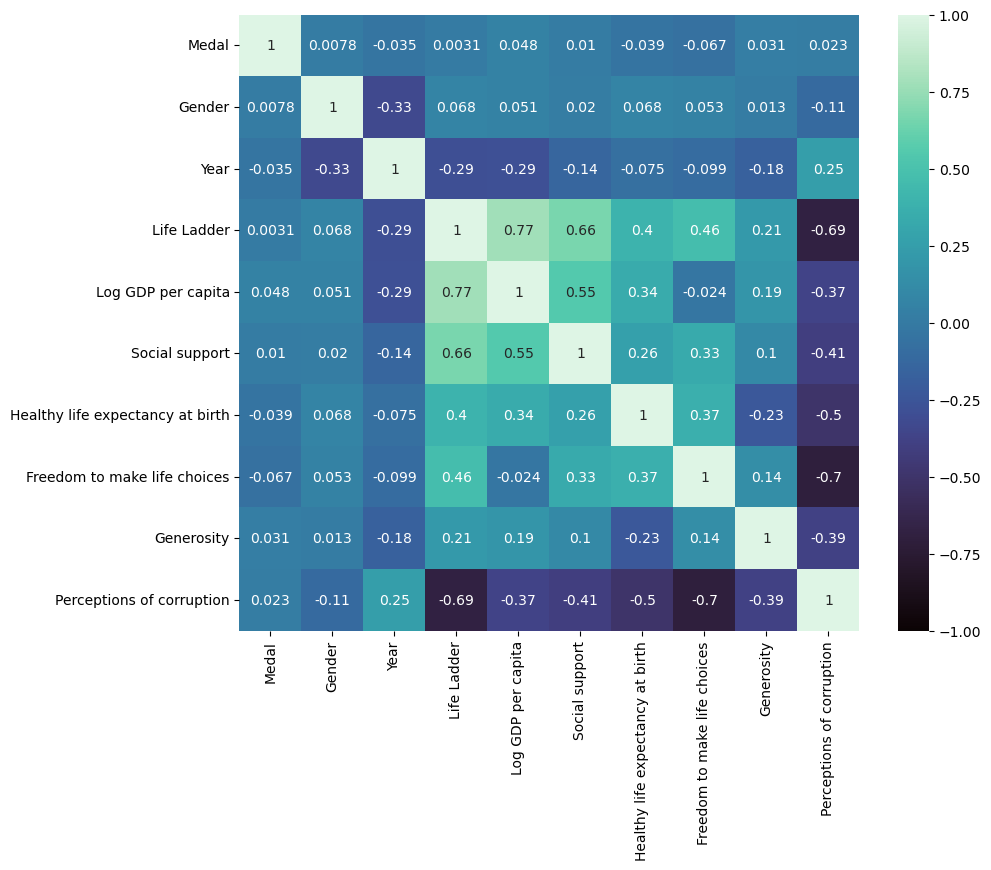

In [52]:
corr = olympicgamesmedalswhr2022.loc[:,:'Perceptions of corruption'].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,vmin=-1.0,cmap='mako');

In [53]:
olympicgamesmedalswhr2022

,Medal,Gender,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,...,Country name_Senegal,Country name_South Korea,Country name_Spain,Country name_Sweden,Country name_Thailand,Country name_Tunisia,Country name_Ukraine,Country name_United Kingdom,Country name_United States,Country name_Uzbekistan
0,0,1,1896,6.998997,10.938917,0.876287,71.275002,0.855503,0.139042,0.524212,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1896,6.998997,10.938917,0.876287,71.275002,0.855503,0.139042,0.524212,...,0,0,0,0,0,0,0,0,0,0
2,0,1,1896,6.998997,10.938917,0.876287,71.275002,0.855503,0.139042,0.524212,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1896,6.998997,10.938917,0.876287,71.275002,0.855503,0.139042,0.524212,...,0,0,0,0,0,0,0,0,0,0
4,0,1,1896,6.998997,10.938917,0.876287,71.275002,0.855503,0.139042,0.524212,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10893,0,1,2020,5.166882,9.733425,0.849509,66.699997,0.723089,0.071887,0.937215,...,0,0,0,0,0,0,0,0,0,0
10894,0,1,2012,5.139501,9.539200,0.775248,58.575001,0.699276,-0.164366,0.802775,...,0,0,0,0,0,0,0,0,0,0
10895,1,1,2016,4.355607,9.134370,0.774262,67.599998,0.759419,-0.152945,0.714585,...,0,0,0,0,0,0,0,0,0,0
10896,0,1,2020,4.355607,9.134370,0.774262,67.599998,0.759419,-0.152945,0.714585,...,0,0,0,0,0,0,0,0,0,0


In [54]:
y = olympicgamesmedalswhr2022['Medal'].copy()
X = olympicgamesmedalswhr2022.drop('Medal',axis=1).copy()

In [55]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.75,random_state=100)

In [57]:
X.shape

(10898, 934)

In [58]:
print('Class Distribution (Positive to Negative): {:.1f}% / {:.1f}%'.format(y_train.mean()*100, (1-y_train.mean())*100))

Class Distribution (Positive to Negative): 32.8% / 67.2%


In [59]:
inputs = tf.keras.Input(shape=(X.shape[1]))
x=tf.keras.layers.Dense(64,activation='relu')(inputs)
x=tf.keras.layers.Dense(64,activation='relu')(x)
outputs=tf.keras.layers.Dense(1,activation='sigmoid')(x)

model=tf.keras.Model(inputs,outputs)

model.compile(
    optimizer = 'adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)

history = model.fit(
    X_train,
    y_train,
    validation_split=0.25,
    batch_size = 32,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

Epoch 1/100
192/192 [==============================] - 2s 5ms/step - loss: 0.6776 - accuracy: 0.6482 - auc: 0.4801 - val_loss: 0.6719 - val_accuracy: 0.6551 - val_auc: 0.4679
Epoch 2/100
192/192 [==============================] - 1s 3ms/step - loss: 0.6088 - accuracy: 0.6729 - auc: 0.6274 - val_loss: 0.7086 - val_accuracy: 0.6086 - val_auc: 0.4502
Epoch 3/100
192/192 [==============================] - 1s 3ms/step - loss: 0.5808 - accuracy: 0.6913 - auc: 0.6871 - val_loss: 0.7440 - val_accuracy: 0.6208 - val_auc: 0.4516
Epoch 4/100
192/192 [==============================] - 1s 4ms/step - loss: 0.5565 - accuracy: 0.6980 - auc: 0.7264 - val_loss: 0.7697 - val_accuracy: 0.6238 - val_auc: 0.4502


In [60]:
model.evaluate(X_test,y_test)

86/86 [==============================] - 0s 2ms/step - loss: 0.6659 - accuracy: 0.6525 - auc: 0.4802


[0.6658956408500671, 0.6524770855903625, 0.48020851612091064]

In [61]:
y_true = np.array(y_test)
y_pred = np.squeeze((model.predict(X_test) >= 0.5).astype(int))

86/86 [==============================] - 0s 1ms/step


In [62]:
print('Classification Report:\n\n', classification_report(y_true,y_pred))

Classification Report:

               precision    recall  f1-score   support

           0       0.67      0.96      0.79      1825
           1       0.25      0.03      0.05       900

    accuracy                           0.65      2725
   macro avg       0.46      0.49      0.42      2725
weighted avg       0.53      0.65      0.54      2725



In [63]:
print('Confusion Matrix:\n',confusion_matrix(y_true,y_pred))

Confusion Matrix:
 [[1755   70]
 [ 877   23]]


The accuracy 65% was low because of how import the features are to explain the model.
To make the model more accurate add other variables (merging with other data) such as GDP per capita, athlete weight, height age,and others can be used. 
Other data could be used such as:
[120 years olympic history athletes and results](https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results)
or this [olympics data cleaning exploration prediction](https://www.kaggle.com/code/chadalee/olympics-data-cleaning-exploration-prediction) which has the code to go along with it. Parts of this [video](https://www.youtube.com/watch?v=kjdVOeV0Ytw&t=1176s) were used.

Precision:

For class 0: 0.67
For class 1: 0.25
Precision is the ability of the classifier not to label a positive instance as negative. In this context, it means that for class 0, 67% of the instances predicted as class 0 were correct, and for class 1, 25% of the instances predicted as class 1 were correct.

Recall (also known as Sensitivity or True Positive Rate):

For class 0: 0.96
For class 1: 0.03
Recall is the ability of the classifier to find all the positive instances. For class 0, 96% of the actual class 0 instances were correctly identified, while for class 1, only 3% of the actual class 1 instances were correctly identified. This indicates that the model is very good at recognizing class 0 but not class 1.

F1-Score:

For class 0: 0.79
For class 1: 0.05
The F1-score is the harmonic mean of precision and recall. It provides a single score that balances both precision and recall. For class 0, the F1-score is 0.79, indicating a good balance between precision and recall, whereas for class 1, the F1-score is low at 0.05, indicating poor performance.

Support:

For class 0: 1825
For class 1: 900
Support represents the number of actual instances of each class in the dataset.

Accuracy:

Overall accuracy: 0.65
Accuracy is the ratio of correctly predicted instances to the total instances in the dataset. In this case, the model's overall accuracy is 65%, which means it correctly classifies 65% of the instances.

Macro Average (Macro Avg):

Precision: 0.46
Recall: 0.49
F1-Score: 0.42
Macro average computes the average of precision, recall, and F1-score for each class independently and then takes the unweighted mean of those averages.

Weighted Average (Weighted Avg):

Precision: 0.53
Recall: 0.65
F1-Score: 0.54
Weighted average computes the average of precision, recall, and F1-score for each class independently, but it takes into account the number of instances for each class, providing more weight to the class with more data.

In summary, this classification report suggests that the model performs relatively well for class 0 with high precision, recall, and F1-score, but it performs poorly for class 1 with very low recall and F1-score. The overall accuracy of the model is 65%. The macro and weighted averages provide a summary of the overall performance across both classes, with the weighted average giving more importance to class 0 due to its larger support.